This dataset is from Amazon's customer reviews on cell phones.This dataset focuses on both unlocked and locked carriers, and scoped on ten brands: ASUS, Apple, Google, HUAWEI, Motorola, Nokia, OnePlus, Samsung, Sony, and Xiaomi.
In this notebook we are performing data wrangling and exploratory analysis.

Goal : predict rating based on reviews. 
       Predict top 3 cell phone brands that have highest positive reviews. 

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
items_data = pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone3Data/items.csv')

In [3]:
reviews_data = pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone3Data/reviews.csv')

In [4]:
items_data.shape

(720, 10)

In [5]:
items_data.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [6]:
items_data.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [7]:
items_data.isna().sum()

asin             0
brand            4
title            0
url              0
image            0
rating           0
reviewUrl        0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [8]:
#There are some null values in brand column. 

In [9]:
#Drop null values 
items_data.dropna(inplace=True) ## is it ok to drop ?? 

##### Explore items_data dataset

In [10]:
items_data.nunique()

asin             716
brand             10
title            714
url              716
image            675
rating            33
reviewUrl        716
totalReviews     246
price            451
originalPrice     89
dtype: int64

Note that - Rating has 33 unique values, originalPrice 90 and price 453. There are 10 unique brands like we know.

In [11]:
items_data.rating.mean()

3.7141061452513977

In [12]:
items_data.rating.mode() # the most frequently repeated value

0    4.1
dtype: float64

In [13]:
#

<AxesSubplot:xlabel='brand', ylabel='count'>

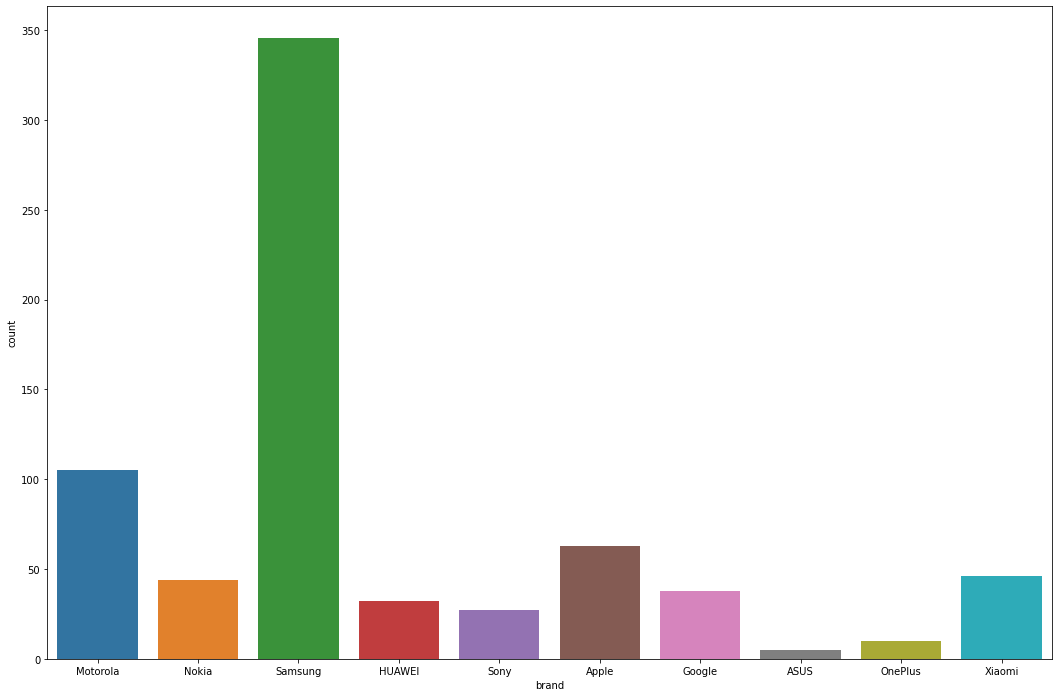

In [14]:
#Count how many phiones of each brand are there in items
plt.figure(figsize=(18,12))
sns.countplot(x='brand', data=items_data)
#Refer: https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

So Samsung leads. There are almost 350 samsung phones in the items dataset, around 100 Motorola phones and around 65-70 Apple phones.

In [15]:
#Based on items dataset, let' see which brand phone had max total reviews
MaxReviews = items_data.groupby('brand')['totalReviews'].sum().sort_values(ascending=False)
MaxReviews

brand
Samsung     37701
Motorola     9419
Apple        6315
Nokia        6182
Xiaomi       5574
Google       4238
Sony         3312
HUAWEI       2467
OnePlus       406
ASUS          263
Name: totalReviews, dtype: int64

<AxesSubplot:xlabel='brand'>

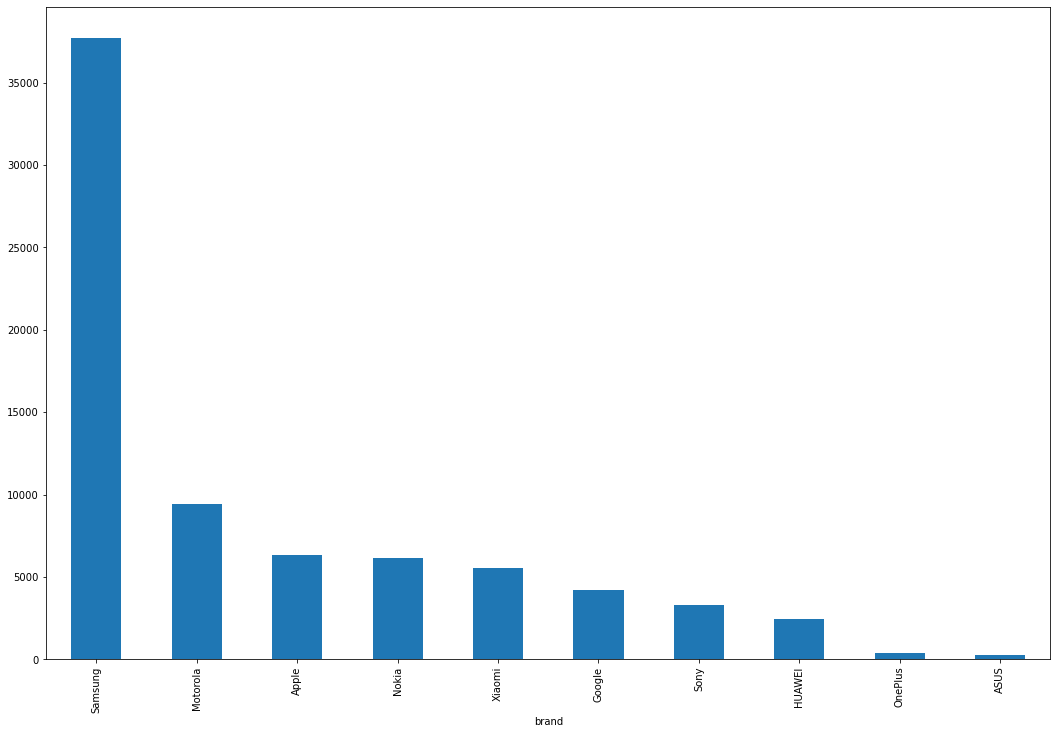

In [16]:
#Visualize which Brand has highest Total Reviews
plt.figure(figsize=(18,12))
MaxReviews.plot(kind='bar')

No suprise here!! Samsung is the ost reviewed- at almost 37,000. The second highest Motorola has 9419, that's not even half of Samsung's reviews. Apple at third with 6315, followed closely by Nokia.

In [17]:
AvgItemRating = items_data.groupby('brand')['rating'].mean().sort_values(ascending=False)
AvgItemRating

brand
Xiaomi      4.415217
HUAWEI      4.021875
ASUS        3.860000
Sony        3.788889
Apple       3.782540
Google      3.771053
Motorola    3.643810
Samsung     3.632659
OnePlus     3.580000
Nokia       3.386364
Name: rating, dtype: float64

<AxesSubplot:xlabel='brand'>

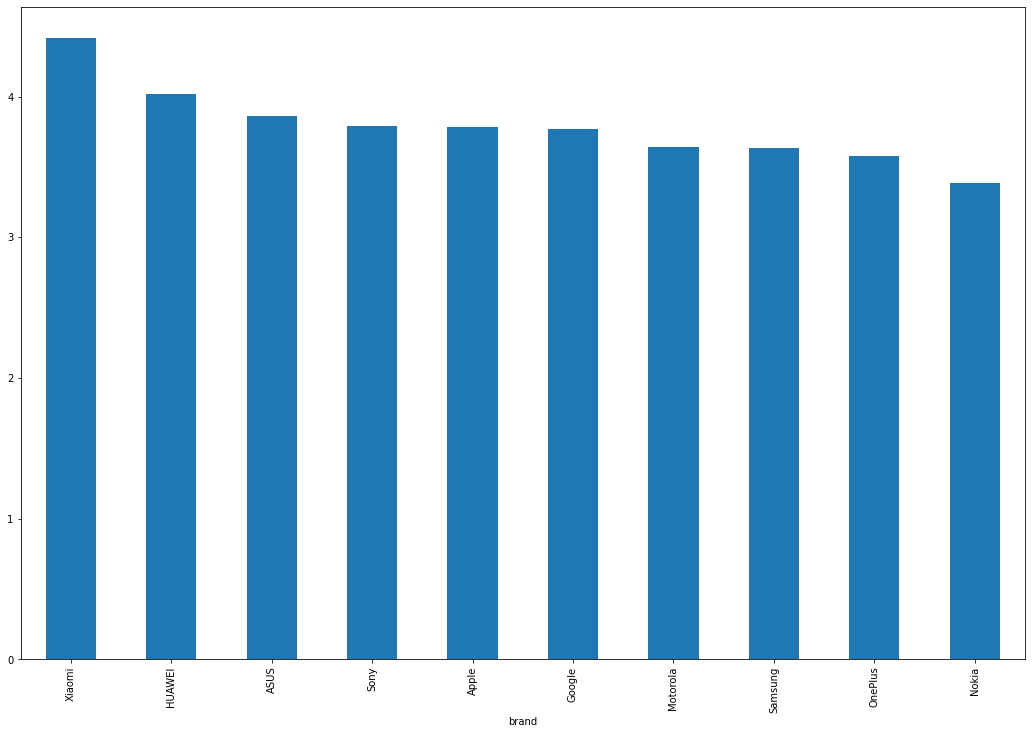

In [18]:
#let's visulaize the same
plt.figure(figsize=(18,12))
AvgItemRating.plot(kind='bar')

So,Xiaomi has the highest avg rating of - 4.42, followed by HUAWEI at 4.02, at 3rd place ASUS at 3.86. According to this dataset, none of the big 3 brands - Samsung, Motorola and Apple have the highest average rating. 

<AxesSubplot:xlabel='brand', ylabel='rating'>

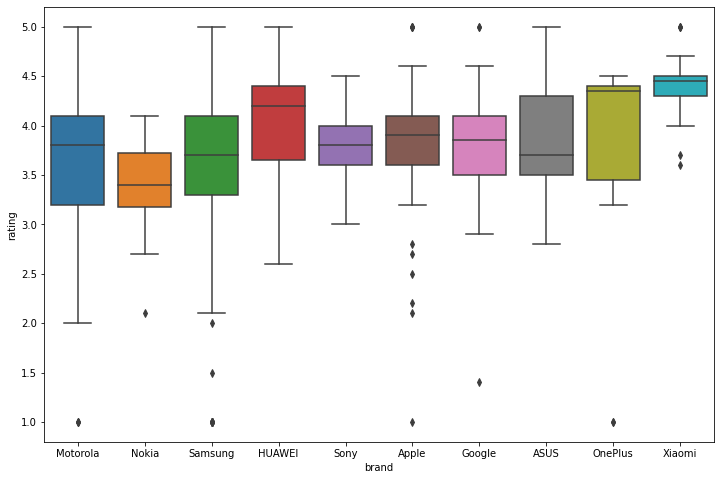

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='brand', y='rating', data=items_data) 

The graph tells a slightly different story. Xiaomi has the highest avg rating 4.4, not different from our calculation.  OnePlus stands in the second place at an avg rating of around 4.3. This is different from the rating what we calculaed earlier(3.5). This may be because it has outliers at a very low rating(at 1). We can see that Apple and Samsung also has many outliers.According to the graph, HUAWEI has an avg rating of 4.2. 

<AxesSubplot:xlabel='brand', ylabel='price'>

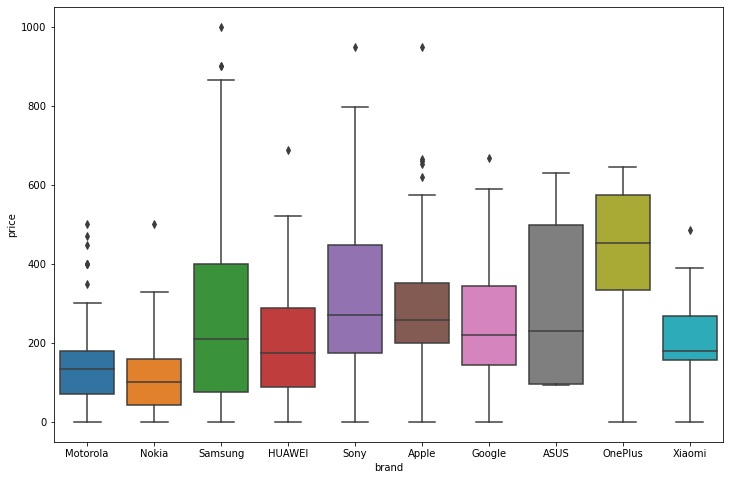

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='brand', y='price', data=items_data) 

According to this graph, Motorola's average price is around 150$ , Samsung around 200$ and Apple's avg price is 
around 280$ and One plus has a higher avg price of around 450$. Nokia has the cheapest pice . 

##### Clean the reviews dataset

In [21]:
reviews_data.shape

(67986, 8)

In [22]:
reviews_data.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0


In [23]:
reviews_data.isna().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [24]:
#We have some missing values in Title and body. 

In [25]:
reviews_data[reviews_data['body'].isna()].head(25)

,asin,name,rating,date,verified,title,body,helpfulVotes
9445,B00HPP3QD6,Jess,5,"September 10, 2015",True,Five Stars,NaN,3.0
18055,B013XAPUW6,Chasidy Lambert,2,"November 18, 2017",True,The Wrong Phone Color,NaN,NaN
19749,B018OMP8ES,Chasidy Lambert,2,"November 18, 2017",True,The Wrong Phone Color,NaN,NaN
20892,B01CJ3SCJ6,Mandy Catoe,1,"May 7, 2018",True,DON'T BUY FROM CLEAN ELECTRIC!!!!!,NaN,NaN
21149,B01CJ3SF02,Jessica,1,"June 7, 2017",True,I regret this purchase!,NaN,1.0
21887,B01D1J9BGU,Amazon Customer,1,"October 26, 2017",True,One Star,NaN,1.0
22917,B01DZ2CS4U,Mandy Catoe,1,"May 7, 2018",True,DON'T BUY FROM CLEAN ELECTRIC!!!!!,NaN,NaN
29501,B01N9XOXCK,Ali,5,"February 21, 2018",False,Hi,NaN,NaN
30010,B01NB1KG8U,Sylvester Ofosuhene,5,"December 24, 2019",True,NaN,NaN,NaN
35596,B071JP8XDJ,Stephanie M,5,"May 30, 2018",False,Love the camera!,NaN,1.0


We could drop those rows in which both title and body is missing. 

In [26]:
missing_reviews = reviews_data[['title', 'body']].isnull().sum(axis=1)
missing_reviews.value_counts()

0    67956
1       25
2        5
dtype: int64

In [27]:
#ski_data = ski_data[missing_price!= 2]
reviews_data = reviews_data[missing_reviews!= 2]

In [28]:
reviews_data.isna().sum()

asin                0
name                2
rating              0
date                0
verified            0
title               9
body               16
helpfulVotes    40766
dtype: int64

##### Explore reviews_dataset

In [29]:
reviews_data.rating.mean()

3.8078286580073843

In [30]:
reviews_data.rating.mode() # most frequently found rating

0    5
dtype: int64

#### Merge dataframes

In [31]:
#let's check the columns in reviews and items datasets

In [32]:
items_data.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [33]:
reviews_data.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [34]:
items_reviews= pd.merge(items_data, reviews_data, on=['asin','title','rating'])

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1141: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [35]:
items_data.dtypes

asin              object
brand             object
title             object
url               object
image             object
rating           float64
reviewUrl         object
totalReviews       int64
price            float64
originalPrice    float64
dtype: object

In [36]:
reviews_data.dtypes

asin             object
name             object
rating            int64
date             object
verified           bool
title            object
body             object
helpfulVotes    float64
dtype: object

Some columns have the same column names in both dataframes items_data and reviews_data. But their meaning and content is different. For example , rating in items_data is float datatype and in reviews_data it is of int datatype. The column 'title' is also present in both dataframes. In items_data it is title is name of the cell phone brand and in reviews it is the title of the reviews. 

In [37]:
#Let's merge the dataframes only on  column 'asin'
items_reviews= pd.merge(items_data, reviews_data, on='asin')

In [38]:
items_reviews.head(10)

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,William B.,4,"February 9, 2006",False,Exellent Service,I have been with nextel for nearly a year now ...,NaN
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,K. Mcilhargey,5,"February 7, 2006",False,I love it,"I just got it and have to say its easy to use,...",NaN
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,NaN
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,NaN
5,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,L. Hughes,1,"July 21, 2005",False,WARNING,My problems with nextel did not stop when I ca...,NaN
6,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,1 Stop 4 Whats HOT,5,"June 27, 2009",False,NEXTEL BOOST PHONE,GREAT PRODUCT THAT IS AS GREAT FOR NEXTEL AS I...,NaN
7,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0,Thomas,4,"September 17, 2010",True,"Nice, but",I bought this phone to replace an LG phone tha...,NaN
8,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0,"Kei, San Jose, CA",1,"May 13, 2017",True,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,NaN
9,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0,Kristy,1,"March 13, 2019",True,Supply are needed,The phone did not come with a charger and didn...,NaN


In [39]:
items_reviews.shape

(67781, 17)

In [40]:
#let's rename those columns to avoid ambiguity
items_reviews= items_reviews.rename(columns={'title_x':'phone_title', 'rating_x':'item_overall_rating', 'rating_y':'review_rating',
                                               'title_y':'review_title'})

In [41]:
items_reviews.isna().sum()

asin                       0
brand                      0
phone_title                0
url                        0
image                      0
item_overall_rating        0
reviewUrl                  0
totalReviews               0
price                      0
originalPrice              0
name                       2
review_rating              0
date                       0
verified                   0
review_title               9
body                      16
helpfulVotes           40701
dtype: int64

We can fill(replace) NAN values in review_title and body with empty string.

In [42]:
items_reviews.fillna(" ",inplace=True)

In [43]:
items_reviews.isna().sum()

asin                   0
brand                  0
phone_title            0
url                    0
image                  0
item_overall_rating    0
reviewUrl              0
totalReviews           0
price                  0
originalPrice          0
name                   0
review_rating          0
date                   0
verified               0
review_title           0
body                   0
helpfulVotes           0
dtype: int64

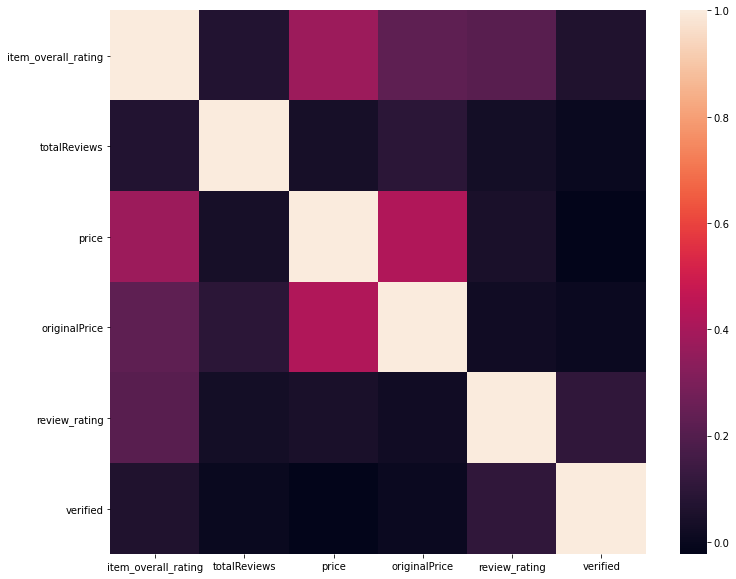

In [44]:
#let's plot a heat map to see if there is a correlation between different columns
plt.subplots(figsize=(12,10))
sns.heatmap(items_reviews.corr());

This graph looks interesting. Although there is no high correlation between columns, we can see that price and item's_overall_rating are correlated. Not suprising, price and original Price are correlated. We can also see that item's overall_rating and review_rating have some correlation. There is also some positive correlation between tem_overall rating and original price.

##### Save the file

Let's save this file to use it in the next step - for pre-procesing and modeling.

In [45]:
items_reviews.to_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone3Data/item_reviews.csv')